# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
# import pylab
#import matplotlib.ticker as ticker # три закоментированные импорта помогли отобразить подпись на гистограммах, 
# но если их закомментить, подписи все равно отображаются, хотя до импорта не отображались

df = pd.read_csv('real_estate_data.csv', sep='\t')
df.info()
df.describe() # по ширине отображает максимум 17 столбцов, а в таблице их 22

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [2]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


### Вывод

При изучении файла обнаружено, что файл имеет 23698 наблюдений. Практически половина значений (54%) отсутсвутют. Вероятная причина: эти пропуски преднамеренно не заполнили те, кто подавал объявление, так как, видимо, при приме объявления эти параметры были не обязатьельными. Либо вопрос необходимо задать тем, кто принимал объявление от продавцов. Либо эти данные были интегрированны в общую таблицу из другого источника, в которых указание этих значений являлось не обязательным. Нахожу целесообразным восстановить ряд данных.

Некоторые типы данных в столбцах опредлены неверно, их следует заменить, обоснование будет приведено при соотсвующей замене.
Обнаружен ряд выбивающихся подозрительных значений:
* **Общая площадь** макс. значение 900 кв.м, это практически километр;
- **Количество комнат** макс. значение 19 комнат, может это одна и та же квартира;
- **Высота потолка** макс. значение 100 метров, в Эрмитаже и то меньше;
- **Количество этажей** макс. значение 60. В Петербурге есть два небоскреба: Leader Tower - 43 этажа, Лахта-Центр (Газпром) 87 этажей, но жилых помещений там нет, и вообще он до сих пор не сдан. У всех остальных зданий этажность меньше;
- **Жилая площадь** макс. 409 метров, возможно большой частный дом, но скорее исключение;
Также я бы обратил внимание на нулевые значения в графах близости аэропорта (оценил бы объем этих значений и заменил бы их на расстояние до ближайших жилых домов).

### Шаг 2. Предобработка данных

Переименуем неправильно именованные столбцы (исправим код-стайл) и слишком длинные названия укоротим, чтобы таблица лучше вмещалась по ширине.

In [3]:
df.set_axis(['imgage', 'last_price', 'total_s', 'date_exposition', 'rooms', 'ceiling_h', 'floors', 
             'living_s', 'floor', 'apartment', 'studio', 'open_plan', 'kitchen_s', 'balcony', 'city_name', 
             'airport_dist', 'center_dist', 'parks_3km', 'parks_m', 'ponds_3km', 'ponds_m', 
             'days_exposition'], axis='columns', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   imgage           23699 non-null  int64  
 1   last_price       23699 non-null  float64
 2   total_s          23699 non-null  float64
 3   date_exposition  23699 non-null  object 
 4   rooms            23699 non-null  int64  
 5   ceiling_h        14504 non-null  float64
 6   floors           23613 non-null  float64
 7   living_s         21796 non-null  float64
 8   floor            23699 non-null  int64  
 9   apartment        2775 non-null   object 
 10  studio           23699 non-null  bool   
 11  open_plan        23699 non-null  bool   
 12  kitchen_s        21421 non-null  float64
 13  balcony          12180 non-null  float64
 14  city_name        23650 non-null  object 
 15  airport_dist     18157 non-null  float64
 16  center_dist      18180 non-null  float64
 17  parks_3km   

Для правильного опредления пропусков - необходимо сначала опредлеить и подсчитать дубликаты строк в таблице и удалить их.

In [4]:
df.duplicated().sum()

0

Дубликатов не обнаружено. Далее следует перейти к подсчету пропусков.

In [5]:
df.isnull().sum()

imgage                 0
last_price             0
total_s                0
date_exposition        0
rooms                  0
ceiling_h           9195
floors                86
living_s            1903
floor                  0
apartment          20924
studio                 0
open_plan              0
kitchen_s           2278
balcony            11519
city_name             49
airport_dist        5542
center_dist         5519
parks_3km           5518
parks_m            15620
ponds_3km           5518
ponds_m            14589
days_exposition     3181
dtype: int64

In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

imgage - 0%
last_price - 0%
total_s - 0%
date_exposition - 0%
rooms - 0%
ceiling_h - 39%
floors - 0%
living_s - 8%
floor - 0%
apartment - 88%
studio - 0%
open_plan - 0%
kitchen_s - 10%
balcony - 49%
city_name - 0%
airport_dist - 23%
center_dist - 23%
parks_3km - 23%
parks_m - 66%
ponds_3km - 23%
ponds_m - 62%
days_exposition - 13%


Заменим пропущенные данные в графе удаленности от центра: 
- **center_dist** (*удаленность от центра Петербурга*) - отсутсвует 23% значений (5519). Так как информация об удаленности от центра напрямую используется в выводых исследования, считаю необходимым хотя бы половину этих пропусков заполнить точными значениями. Оставшиеся населенные пункты, которые не удасться покрыть данными из словаря (3211 - 13% более мелких населенных пунктов) - раздадим им среднее значение, поскольку все населенные пункты равноудалены от центра Петербурга, а расстояние в графе center_dist указано именно до центра Петербурга, считаем целесообразным заменить пропуски на среднеарифметическим значением.

In [7]:
distances = {'Гатчина': 48000, 'Павловск': 31000, 'Сестрорецк': 37000, 'Пушкин': 26000, 'Петродворец': 45000, 'Выборг': 140000, 
            'Петергоф': 45000, 'Стрельна': 32000, 'Колпино': 33000, 'деревня Кудрово': 12000, 'городской посёлок Янино-1': 13000,
            'посёлок Бугры': 23000, 'посёлок Мурино': 22000, 'Сосновый бор': 100000, 'Всеволожск': 25000, 'Зеленогорск': 55000,
            'Красное Село': 31000, 'Ломоносов': 53000, 'Сертолово': 38000, 'Кронштадт': 54000, 'Тосно': 56000, 'посёлок Металлострой': 21000, 
             'Санкт-Петербург': 10000, 'посёлок Парголово': 20000, 'поселок городского типа Красный Бор': 38000, "посёлок Шушары": 16000, 
             "Кировск": 47000, 'поселок Новый Учхоз': 67000, 'село Рождествено': 81000,
            }

def dist_from_center(row):
    s = str(row['center_dist'])    # определим есть ли в строке nan и преобразуем для возможности сравнения в строку
    if s != 'nan':                  # если в строке не nan
        return row['center_dist']  # то мы вернем прежнее значение в ячейку
    if row['city_name'] in distances and s == 'nan': # если город есть в словаре и строка == nan
        return distances[row['city_name']]                     # в таблице nan меняем на найденное значение в словаре
    else:
        return row['center_dist']

df['center_dist'] = df.apply(dist_from_center, axis=1)
df.loc[df.center_dist.isnull(), 'center_dist'] = round(df.center_dist.mean()) # удаленность от центра заменили средним

df.loc[:, ['city_name', 'center_dist']]

,city_name,center_dist
0,Санкт-Петербург,16028.0
1,посёлок Шушары,18603.0
2,Санкт-Петербург,13933.0
3,Санкт-Петербург,6800.0
4,Санкт-Петербург,8098.0
...,...,...
23694,Санкт-Петербург,4232.0
23695,Тосно,56000.0
23696,село Рождествено,81000.0
23697,Санкт-Петербург,10364.0


* **ceiling_h** (*высота потолков*) - отсутсвует 38% значений (существенно). Выводы исследования напрямую затрагивают высоту потолков. На наш взгляд, целесообразно было бы опредлеить в каких именно квартирах отсуствуют значения высоты потолков и заполнить пропуски средним значениями подобных квартир. Но для этого необходимо будет перегруппировать данные так, чтобы опредлеить подобные квартиры - за основу взять удаленность от центра города (в Петербурге сталинские и дореволюционные дома с высокими потолками располагаются ближе к центру). Квартиры с удалением от центра города до 8500 м считать квартирами  с высокими потолками ирассчитать медианное значение для квартир этой группы. Хрущевок и современных домов в центре нет. Для квартир на окраинах города или за городом (расстояние более 8500 от центра) - рассчитать медианное значение для этой группы и присвоить его аналогичным квартирам из этой группы. 
Рассчитаем среднюю высоту потолка в старых квартирах в центре и отдлеьно в квартирах на окраинах и заменим соотсвующими значениями.

In [8]:
center_flats_df = df.query('center_dist <= 8500')
outskirts_flats_df = df.query('center_dist > 8500')

ceiling_center_mean = round(center_flats_df.ceiling_h.mean(), 2) # в центре высота потолка =3,13
ceiling_outerskirts_mean = round(outskirts_flats_df.ceiling_h.mean(), 2) # на окраине высота потолка =2,69                                        
                                                 
def defenition_center_dist(row):
    s = str(row['ceiling_h'])    # определим есть ли в строке nan и преобразуем для возможности сравнения в строку
    if s != 'nan':               # если в строке не nan
        return row['ceiling_h']  # то мы вернем прежнее значение в ячейку и проанализируем следующую
    if row['center_dist'] <= 8500 and s == 'nan': # если это квартира в центре и строка == nan
        return ceiling_center_mean                # и присываиваем в яччейку среднее значение потолка 3,13 м
    if row['center_dist'] > 8500 and s == 'nan':  # если это квартира на окраине и строка == nan
        return ceiling_outerskirts_mean           # и присываиваем в яччейку среднее значение потолка 2,69 м

df['ceiling_h'] = df.apply(defenition_center_dist, axis=1)
df.loc[:, ['center_dist', 'ceiling_h']].tail(10)

,center_dist,ceiling_h
23689,16081.0,2.86
23690,6263.0,3.13
23691,4489.0,2.75
23692,17094.0,2.69
23693,34104.0,2.60
23694,4232.0,3.70
23695,56000.0,2.69
23696,81000.0,2.69
23697,10364.0,3.00
23698,67000.0,2.50


In [9]:
print(f'Среднее значение высоты потолков в целом по СПБ и ЛО составляет {round(df.ceiling_h.mean(), 2)} метра. ')

Среднее значение высоты потолков в целом по СПБ и ЛО составляет 2.77 метра. 


- **airport_dist** (*расстояние до аэропорта в м*) - отсутсвует 23% значений (5542). Мы предлагаем измерить расстояние до конкретных населенных пунктов и заменить ими пустые значения.


In [10]:
distances = {'Гатчина': 28300, 'Павловск': 16200, 'Сестрорецк': 60000, 'Пушкин': 12000, 'Петродворец': 33000, 'Выборг': 150000, 
            'Петергоф': 33000, 'Стрельна': 25200, 'Колпино': 27000, 'деревня Кудрово': 27000, 'городской посёлок Янино-1': 30000,
            'посёлок Бугры': 48000, 'посёлок Мурино': 47000, 'Сосновый бор': 95000, 'Всеволожск': 47000, 'Зеленогорск': 72000,
            'Красное Село': 23000, 'Ломоносов': 41000, 'Сертолово': 56000, 'Кронштадт': 7000, 'Тосно': 50000, 'посёлок Металлострой': 27000, 
             'Санкт-Петербург': 15000, 'посёлок Парголово': 60000, 'поселок городского типа Красный Бор': 33000, "посёлок Шушары": 12000, "Кировск": 55000
            }

def write_airport_dist(row):
    s = str(row['airport_dist'])    # определим есть ли в строке nan и преобразуем для возможности сравнения в строку
    if s != 'nan':                  # если в строке не nan
        return row['airport_dist']  # то мы вернем прежнее значение в ячейку
    if row['city_name'] in distances and s == 'nan': # если город есть в словаре и строка == nan
        return distances[row['city_name']]                     # в таблице nan меняем на найденное значение в словаре
    else:
        return row['airport_dist']

df['airport_dist'] = df.apply(write_airport_dist, axis=1)

df.loc[:, ['city_name', 'airport_dist']].head(7)

,city_name,airport_dist
0,Санкт-Петербург,18863.0
1,посёлок Шушары,12817.0
2,Санкт-Петербург,21741.0
3,Санкт-Петербург,28098.0
4,Санкт-Петербург,31856.0
5,городской посёлок Янино-1,30000.0
6,посёлок Парголово,52996.0


In [11]:
df['airport_dist'].isnull().sum()

3220

Заполнение пропусков, путем подстановки точных расстояний, сократило количество пустых значений практически наполовину, оставшиейся 13%, которые не удалось предусмотреть (очень маленькие редкие поселения) - заменили медианным значением. Проверил результат - рессчитали верно, практически так и есть. Незаполненных значений расстояний до аэропорта не осталось.

In [12]:
df.loc[df.airport_dist.isnull(), 'airport_dist'] = round(df.airport_dist.median())
df['airport_dist'].isnull().sum()

0

Оставшиеся пустые значения заменим группой. 
- **floors** (*кол-во этажей в доме*) - отсутсвует 0,03% значений (крайне низкое), можно смело заменить медианным значением;
- **apartment** (*является ли недвижимость апартаментами*) - отсутсвует 88% значений. Вероятно, значения отсутствуют, потому что объявление не было пемечено как апартаменты (поле осталось пустым). К сведению, по итогам 2019 года, доля продаж апартаментов составила 10% (при росте на 12% по сравнению с 2018 годом: с 8,8 до 10%), жилой недвижимости было продано к концу 2019 года 90%, а значит в исследуемый период 2015-2019 апартаментов было, вероятно, еще меньше 6-10%, а значит отсуствующие 88% значений можно заменить на False - не апартаменты - жилая;
- **kitchen_s** (*площадь кухни*) - отсутсвует 9,5% значений. Либо это жилье является квартирой-студией, либо продается просто комната. Решено пока оставить значение пустым, либо потом заменить на ноль.
- **balcony** (*число балконов*) - отсутсвует 48% значений. Предположим, что если человек не указал балкон, значит его нет - заменим на ноль;
- **city_name** (*населенный пункт*) - отсутсвует 0,2% значений (несущественно). Так основная недвижимость продается в СПБ и пригородах, которые официально являются Питером - можно смело заменить на Санкт-Петербург при дополнительном условии что пустые значения будут у городов в радиусе не более 13000 метров.
- **parks_3km** (*число парков в радиусе 3 км*) - отсутсвует 23% значений (существенно). Заменить на среднеарифметическим значением;
- **ponds_3km** (*число водоёмов в радиусе 3 км*) - заменить на среднеарифметическое число;
- **ponds_m** (*близость водоёма*) - отсутсвует 61% значений (весьма существенно); Можно заменить на среднеарифметическое.
- **days_exposition** (*сколько дней было размещено объявление*) - отсутсвует 13% значений (существенно); Один из выводов исследования касается скорости продажи. Можно оставить пустым либо заменить среднеарифметическим.

Пустые значения расстояний до парков и водоемов нахожу целесообразным заполнить средним. Всё что было выше 20% отсутсвующих значений - дополнительно обратил бы на это внимание предоставивших данные, и согласовал бы метод заполнения отсутсвующих значений.

In [13]:
df.loc[df.floors.isnull(), 'floors'] = round(df.floors.median())
df.loc[df.apartment.isnull(), 'apartment'] = False
df.loc[df.kitchen_s.isnull(), 'kitchen_s'] = 0.0
df.loc[df.balcony.isnull(), 'balcony'] = 0
df.loc[(df.city_name.isnull() & (df.center_dist < 13000)), 'city_name'] = 'Санкт-Петербург' # уменьшит с 49 до 21
df.loc[df.parks_3km.isnull(), 'parks_3km'] = round(df.parks_3km.median()) # снижает риск от выбивающихся значений
df.loc[df.parks_m.isnull(), 'parks_m'] = round(df.parks_m.median())
df.loc[df.ponds_3km.isnull(), 'ponds_3km'] = round(df.ponds_3km.median())
df.loc[df.ponds_m.isnull(), 'ponds_m'] = round(df.ponds_m.mean())
df.loc[df.days_exposition.isnull(), 'days_exposition'] = round(df.days_exposition.mean())

df.isnull().sum()

imgage                0
last_price            0
total_s               0
date_exposition       0
rooms                 0
ceiling_h             0
floors                0
living_s           1903
floor                 0
apartment             0
studio                0
open_plan             0
kitchen_s             0
balcony               0
city_name            21
airport_dist          0
center_dist           0
parks_3km             0
parks_m               0
ponds_3km             0
ponds_m               0
days_exposition       0
dtype: int64

- **living_s** (*жилая площадь в кв.м.) - отсутсвует 7,9% значений (существенный). При более детальном изучении, мы видим, что эта недвижимость в то же время не является ни апартаментами, ни студией, не зависит от метража ни от площади, но практически у всех них нет кухни, скорее всего это комнаты, либо офис или коммерческое помещение. Причина незаполненных данных - неизвестна: либо хотели преднамеренно скрыть непривлекательные данные небольшого метража, либо по документам помещение не является жилым, либо забыли указать. На наш взгляд возможно восстанвовить эти данные по формуле: жилая площадь = общая площадь - кухня - балкон. Те значения, которые не удасться восстановить (не хватит одного из компонентов - удалим всю строку.

In [14]:
df['living_s'] = df['total_s'] - df['kitchen_s'] - df['balcony']
df.living_s.isnull().sum()

0

Все значения жилой площади удалось восстановить.

Некоторые типы данных в столбцах опредлены неверно, их следует заменить: 
* **last_price** (*цена квартиры*) - тип данных float64, цены на жилье с копейками не пишут - заменить на целое число;
- **first_day_exposition** (*дата публикации объявления*) - является строкой (object), а должен иметь тип даты;
- **floors** (*кол-во этажей в доме*) - тип float64, а количество этажей не может быть дробным, заменить на число;
- **apartment** (*является ли недвижимость апартаментами*) - тип object, а должен быть должен быть булевым типом;
- **balcony** (*число балконов*) - тип float64, а количество балконов должно выражаться целым числом;
- **parks_3km** (*число парков в радиусе 3 км*) - тип float64, кол-во необходимо выражать целым числом;
- **parks_m** (*расстояние до ближайшего парка в метрах*) - тип float64 заменить на целое число, дробить метры нет смысла; 
- **ponds_3km** (*число водоёмов в радиусе 3 км*) - тип float64 заменить на целое число;
- **ponds_m** (*расстояние до ближайшего водоёма*) - тип float64 заменить на целое число, дробить метры нет смысла; 
- **days_exposition** (*сколько дней было размещено объявление*) - тип float64 заменить на целое число, дробить дни нет смысла;

In [15]:
df['date_exposition'] = pd.to_datetime(df['date_exposition'], format='%Y-%m-%d %H:%M:%S')
df['floors'] = round(df['floors']).astype('int')
df['balcony'] = df['balcony'].astype('int')
df['apartment'] = df['apartment'].astype('bool')
df['last_price'] = round(df['last_price']).astype('int')
df['center_dist'] = df['center_dist'].astype('int')
df['airport_dist'] = df['airport_dist'].astype('int')
df['parks_3km'] = df['parks_3km'].astype('int')
df['ponds_3km'] = df['ponds_3km'].astype('int')
df['ponds_m'] = df['ponds_m'].astype('int')
df['parks_m'] = df['parks_m'].astype('int')
df['days_exposition'] = df['days_exposition'].astype('int')

df.head(5)

,imgage,last_price,total_s,date_exposition,rooms,ceiling_h,floors,living_s,floor,apartment,...,kitchen_s,balcony,city_name,airport_dist,center_dist,parks_3km,parks_m,ponds_3km,ponds_m,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,83.0,8,False,...,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,181
1,7,3350000,40.4,2018-12-04,1,2.69,11,27.4,1,False,...,11.0,2,посёлок Шушары,12817,18603,0,455,0,518,81
2,10,5196000,56.0,2015-08-20,2,2.69,5,47.7,4,False,...,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,3.13,14,159.0,9,False,...,0.0,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,59.0,13,False,...,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   imgage           23699 non-null  int64         
 1   last_price       23699 non-null  int32         
 2   total_s          23699 non-null  float64       
 3   date_exposition  23699 non-null  datetime64[ns]
 4   rooms            23699 non-null  int64         
 5   ceiling_h        23699 non-null  float64       
 6   floors           23699 non-null  int32         
 7   living_s         23699 non-null  float64       
 8   floor            23699 non-null  int64         
 9   apartment        23699 non-null  bool          
 10  studio           23699 non-null  bool          
 11  open_plan        23699 non-null  bool          
 12  kitchen_s        23699 non-null  float64       
 13  balcony          23699 non-null  int32         
 14  city_name        23678 non-null  objec

### Шаг 3. Посчитайте и добавьте в таблицу

Рассчитаем цену квадратного метра, рузультат добавим в новый столбец. Заранее округлим и уберем дробную часть:

In [17]:
df['price_meter'] = round(df['last_price'] / df['total_s']).astype('int')
df.loc[:, ['total_s', 'last_price', 'price_meter']].head(5)

,total_s,last_price,price_meter
0,108.0,13000000,120370
1,40.4,3350000,82921
2,56.0,5196000,92786
3,159.0,64900000,408176
4,100.0,10000000,100000


Рассчитаем день недели, месяц и год публикации объявления. Определим день недели методом .weekday(), скорректируем полученную цифру на +1 для приведения к правильному исчению по российскому стандарту. Затем получеим срез строки из имеющейся даты, в из которой возьмем год и месяц и переставим их местами. Номеру недели присвоим сокращение из словаря. И полученный результат склеим вместе:

In [18]:
day_weeks = {1: 'Пн', 2: 'Вт', 3: 'Ср', 4: 'Чт', 5: 'Пт', 6: 'Сб', 7: 'Вс'}

def from_datetime64_to_str_and_back(row):
    dayweek = row['date_exposition'].weekday()+1       # приведение номера недели к российскому стандарту методом .weekday()
    slice_date = str(row['date_exposition'])[:7]       # получение нужного среза из даты из таблицы
    slice_date = f'{slice_date[5:7]}.{slice_date[:4]}' # образование новой строки путем перестановки года и месяца
    for i_weekday in day_weeks:                        # для каждого номера в слоавре
        if dayweek == i_weekday:                       # если номер недели из таблицы равен итерируемому номеру в словаре
            dayweek = day_weeks[i_weekday]             # то мы из словаря извлекаем сокращенное название дня недели
    new_date = f'{dayweek}, {slice_date}'              # формируем новую строку дня недели, месяца и года
    return new_date

def day(row):
    weekday = row['date_exposition'].weekday()+1
    return weekday

def month(row):
    month = row['date_exposition'].month
    return month

def year(row):
    year = row['date_exposition'].year
    return year

df['year'] = df.apply(year, axis=1) # заносим отдельно номер года
df['month'] = df.apply(month, axis=1) # заносим отдельно номер месяца
df['weekday'] = df.apply(day, axis=1) # заносим отдельно номер дня недели
df['day_week'] = df.apply(from_datetime64_to_str_and_back, axis=1) # разносим по таблице в новый столбец в соотв-ю строку
df.loc[:, ['date_exposition', 'day_week', 'weekday', 'month', 'year']].head(5)

,date_exposition,day_week,weekday,month,year
0,2019-03-07,"Чт, 03.2019",4,3,2019
1,2018-12-04,"Вт, 12.2018",2,12,2018
2,2015-08-20,"Чт, 08.2015",4,8,2015
3,2015-07-24,"Пт, 07.2015",5,7,2015
4,2018-06-19,"Вт, 06.2018",2,6,2018


Рассчитаем этаж квартиры; варианты — первый, последний, другой:

In [19]:
def detect_floor_level(row): # напишем словами для понимания человеком
    if row['floors'] == row['floor']:
        return 'Последний'
    if row['floor'] == 1:
        return 'Первый'
    else:
        return 'Другой'    
    
df['floor_level'] = df.apply(detect_floor_level, axis=1)
df.loc[:,['floor', 'floors', 'floor_level']].head(5)

,floor,floors,floor_level
0,8,16,Другой
1,1,11,Первый
2,4,5,Другой
3,9,14,Другой
4,13,14,Другой


Рассчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [20]:
df['living_%']=round(df['living_s'] / df['total_s'], 2)
df['kitchen_%']=round(df['kitchen_s'] / df['total_s'], 2)
df.loc[:, ['total_s', 'living_s', 'living_%', 'kitchen_s', 'kitchen_%']].head(5)

,total_s,living_s,living_%,kitchen_s,kitchen_%
0,108.0,83.0,0.77,25.0,0.23
1,40.4,27.4,0.68,11.0,0.27
2,56.0,47.7,0.85,8.3,0.15
3,159.0,159.0,1.00,0.0,0.00
4,100.0,59.0,0.59,41.0,0.41


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Изучим: площадь, цена, число комнат, высота потолков. **Для начала к выбранным столбцам применим метод .describe()**, для получения минимальных и максимальных значений и общего представления. А затем построим гистограммы для каждого параметра и своевременно уберем редкие и выбивающиеся значения.

In [21]:
df.loc[:, ['total_s', 'last_price', 'rooms', 'ceiling_h']].describe()

,total_s,last_price,rooms,ceiling_h
count,23699.000000,2.369900e+04,23699.000000,23699.000000
mean,60.348651,6.541549e+06,2.070636,2.766725
std,35.654083,1.088701e+07,1.078405,0.991574
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.690000
75%,69.900000,6.800000e+06,3.000000,2.750000
max,900.000000,7.630000e+08,19.000000,100.000000


Теперь рассмотрим выбивающиеся значения **общей площади**.

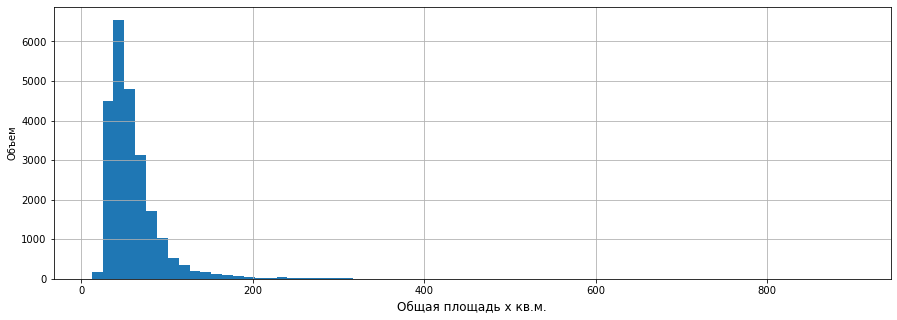

In [22]:
df.total_s.hist(bins=70, figsize=(15, 5))
plt.xlabel('Общая площадь х кв.м.', fontsize=12)
plt.ylabel('Объем')
plt.show()

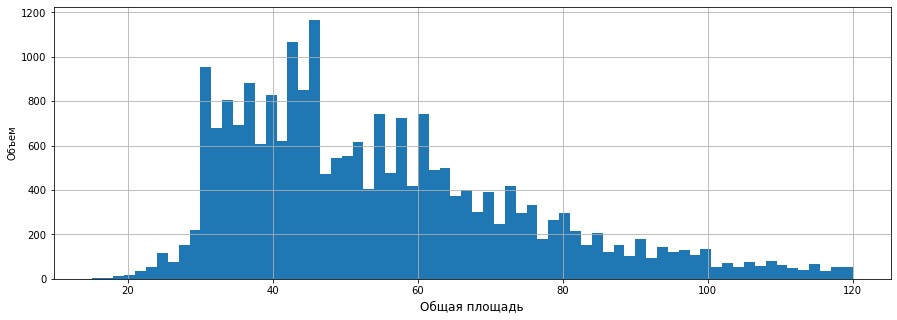

In [23]:
df['total_s'].hist(bins=70, range=(15,120), figsize=(15, 5)) # та же диаграмма с ограниченями диапазона
plt.xlabel('Общая площадь', fontsize=12)
plt.ylabel('Объем')
plt.show()

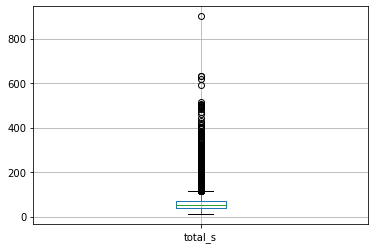

In [24]:
df.boxplot(['total_s'])
plt.show()

Изучим более пристально квартиры с площадью более 580 квадратов.

In [25]:
df['mean_room_square'] = (df['total_s'] - df['kitchen_s']) / df['rooms'] # определим средний размер жилой комнаты

more_580meters = df[df['total_s'] >= 580] # сделаем выборку квартир более 580 метров и упорядочим столбцы
more_580meters[['total_s', 'last_price', 'price_meter', 'living_s', 'living_%', 'rooms', 'mean_room_square', 'kitchen_s', 'kitchen_%']]

,total_s,last_price,price_meter,living_s,living_%,rooms,mean_room_square,kitchen_s,kitchen_%
3117,631.0,140000000,221870,571.0,0.90,7,81.571429,60.0,0.10
5358,590.0,65000000,110169,490.0,0.83,15,32.666667,100.0,0.17
12859,631.2,140000000,221800,610.7,0.97,7,87.385714,19.5,0.03
15651,618.0,300000000,485437,548.0,0.89,7,78.285714,70.0,0.11
19540,900.0,420000000,466667,788.0,0.88,12,65.666667,112.0,0.12


На гистограмме мы видим распределение Пауссона. Чаще всего продают квартитры с примерным метражом в 60 метров. Значения общей площади менее 25 метров и свыше 110 кв.м. следует считать редкими значениями: объявлений о продаже таких квартир за 5 лет наблюдейний менее 100 штук (0,4%). Данная гистограмма имеет длинный хвост вправо (от 110 до 900 кв.метров).
**Выбивающиеся значения обнаружены на уровне 900 кв**. метров. Значения в 590-650 метров предлагаем считать в пределах рыночных значений.

Теперь определим выбивающиеся значения **цены** на продаваемую недвижимость. (значения по оси х обозначают десятки млн)

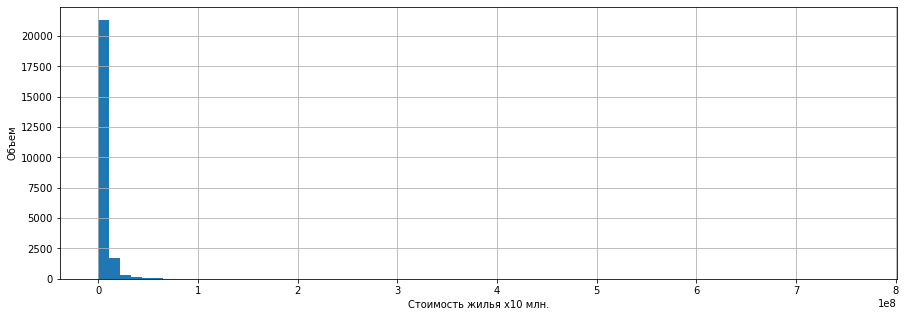

In [26]:
df['last_price'].hist(bins=70, figsize=(15, 5))
plt.xlabel('Стоимость жилья x10 млн.')
plt.ylabel('Объем')
plt.show()

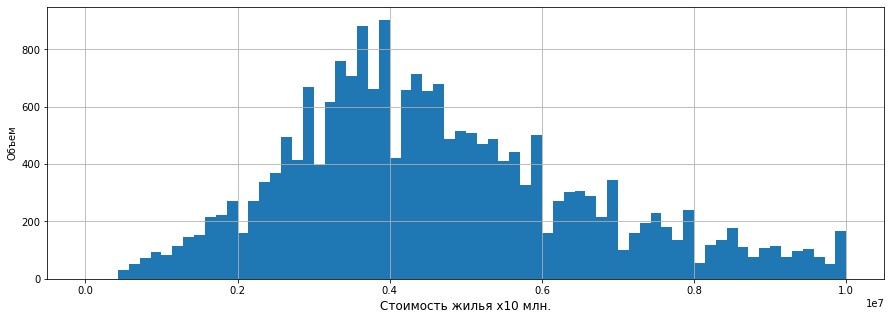

In [27]:
df['last_price'].hist(bins=70, figsize=(15, 5), range=(0,10000000)) # средневзвешенная гистограмма с ограничением диапазона цены
plt.xlabel('Стоимость жилья x10 млн.', fontsize=12)
plt.ylabel('Объем')
plt.show()

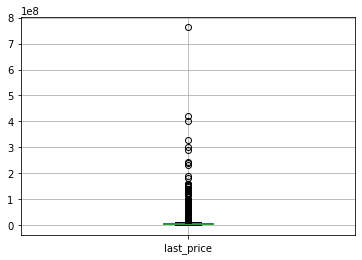

In [28]:
df.boxplot(['last_price']) # опредление выбивающихся значений
plt.show()

In [29]:
print(f'Медианное значение цены на квартиру в СПБ и ЛО составляет {round(df["last_price"].median()) / 1000000} млн.руб.')

Медианное значение цены на квартиру в СПБ и ЛО составляет 4.65 млн.руб.


Гистограмма имеет распределение Пауссона, но мы отсекли длинный правый хвост, значения которого достигают 763 млн.руб. за кв. Значения **менее 500 тыс. и свыше 4,5 млн руб. (в частности 75-80 млн за квартиру) следует считать выбивающимися значениями.**

 Теперь определим выбивающиеся значения **количества комнат.**

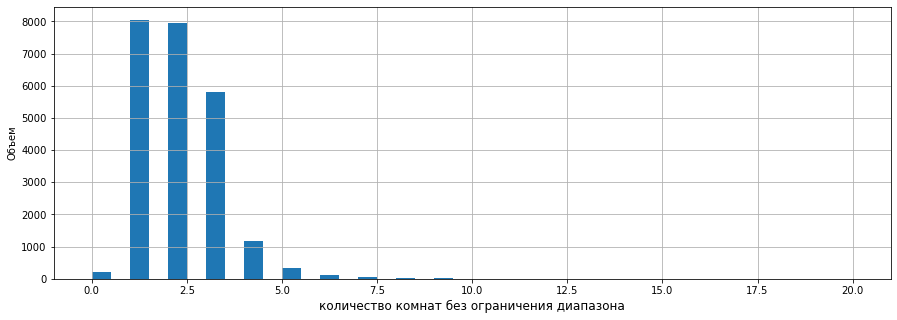

In [30]:
df['rooms'].hist(bins=40, figsize=(15, 5), range=(0,20)) # общая  гистограмма
plt.xlabel('количество комнат без ограничения диапазона', fontsize=12)
plt.ylabel('Объем')
plt.show()

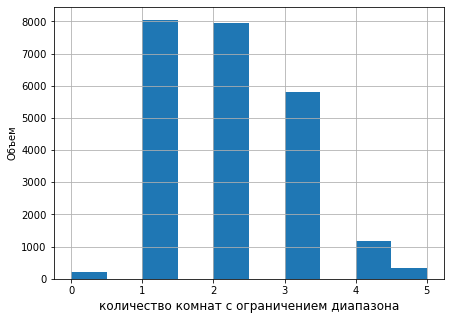

In [31]:
df['rooms'].hist(bins=10, figsize=(7, 5), range=(0,5)) # общая  гистограмма
plt.xlabel('количество комнат с ограничением диапазона', fontsize=12)
plt.ylabel('Объем')
plt.show()

<AxesSubplot:>

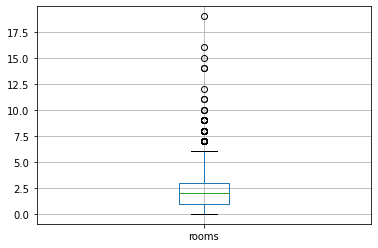

In [32]:
df.boxplot(['rooms'])

Чаще всего в СПб и ЛО продают 1-3 комнатные квартиры. Значения в объявлении в 0 комнат и свыше 4 комнат следует считать выбивающимися значениями: Таких объявлений менее 500 штук ( менее 2%). Хвост право на гистограмме достигает 19 комнат. Причина указания нулевого количества комнат - неизвестна. Вероятно, это либо комерческое помещени, либо квартира-студия, либо продавец не захотел указывать количество комнат. Для определения выбивающихся значений, попробуем более детально изучить квартиры с колчиеством комнат более 13.

In [33]:
more_13rooms = df[df['rooms'] >= 13]
more_13rooms[['last_price', 'price_meter', 'total_s', 'living_s', 'living_%', 'rooms', 'mean_room_square', 'kitchen_s', 'kitchen_%']]


,last_price,price_meter,total_s,living_s,living_%,rooms,mean_room_square,kitchen_s,kitchen_%
866,25000000,68871,363.0,346.4,0.95,14,24.742857,16.6,0.05
5358,65000000,110169,590.0,490.0,0.83,15,32.666667,100.0,0.17
14498,32250000,86092,374.6,347.0,0.93,19,18.263158,27.6,0.07
18848,28500000,105556,270.0,256.0,0.95,16,16.062500,13.0,0.05
20829,28659000,116785,245.4,219.5,0.89,14,15.678571,25.9,0.11


Можем предположить, что **выбивающимся значением можно считать 19 комнат**, однако учитывая среднюю площадь комнат и общую площадь, можно сделать вывод, что все в пределах рыночных вероятных значений. Однако, **конкретного вывода на этот счет сделать не удалось.**

Изучим **время продажи квартиры**. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго.

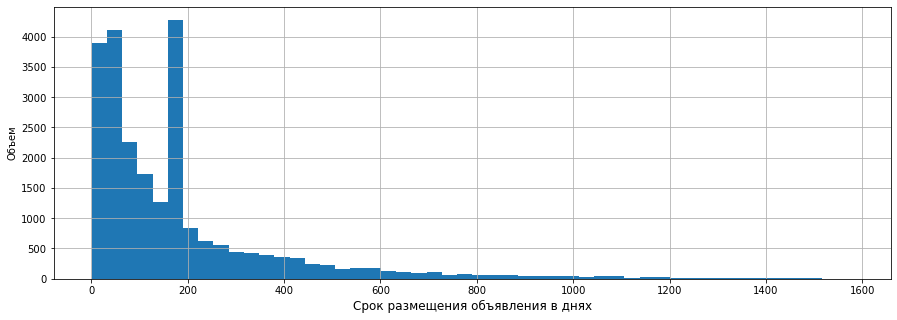

In [34]:
df['days_exposition'].hist(bins=50, figsize=(15, 5)) # общая  гистограмма
plt.xlabel('Срок размещения объявления в днях', fontsize=12)
plt.ylabel('Объем')
plt.show()

<AxesSubplot:>

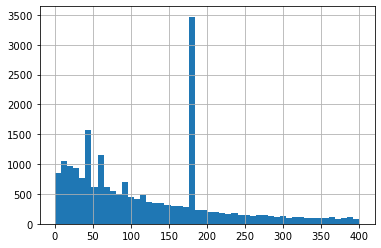

In [35]:
df['days_exposition'].hist(bins=50, range=(0, 400)) # средневзвешенная гистограмма с ограничением диапазона времени в днях

<AxesSubplot:>

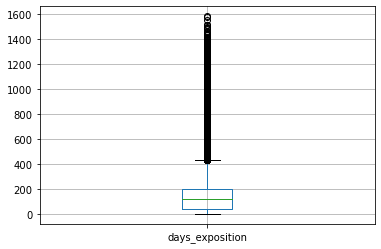

In [36]:
df.boxplot(['days_exposition'])

In [37]:
df['days_exposition'].median()

124.0

Время продажи квартиры имеет ярковыраженное распределение Пауссона. На основании полученных данных, можем сделать вывод, что **среднее время продажи квартиры 124 дня** (три месяца), если квартира продается больше года - срок дольше обычного. **Выбивающихся значений как таковых не обнаруженно**, таковыми можно считать свыше 1 года.

Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. 

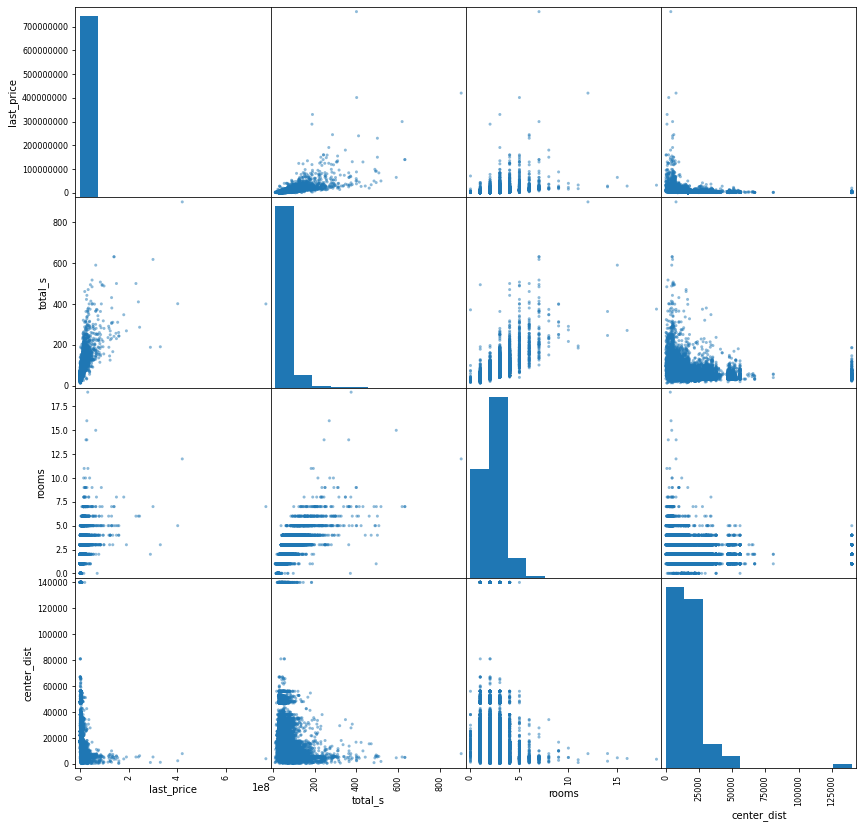

In [38]:
main_price_factors = df[['last_price', 'total_s', 'rooms', 'center_dist']]
pd.plotting.scatter_matrix(main_price_factors, figsize=(14, 14)) 
plt.show()

In [39]:
main_price_factors.corr(method ='pearson')

,last_price,total_s,rooms,center_dist
last_price,1.000000,0.653675,0.363343,-0.155236
total_s,0.653675,1.000000,0.758344,-0.144977
rooms,0.363343,0.758344,1.000000,-0.096246
center_dist,-0.155236,-0.144977,-0.096246,1.000000


1) **Наибольшее влияние на цену оказывает площадь квартиры.**

2) Ярковыраженной взаимосвязи между **ценой и количеством комнат** не наблюдается, особенно при значениях свыше 5 комнат и дороже 20 млн рублей за квартиру.

3) Ярковыраженной взаимосвязи между **ценой и удаленностью квартиры** не наблюдается: некоторая взаимосвзяь может быть обнаружена при  стоимости квартиры до 10 млн рублей и при удалении от центра не далее 15 км.

Изучим зависимость цены от того, **на каком этаже расположена квартира**: первом, последнем или другом. 

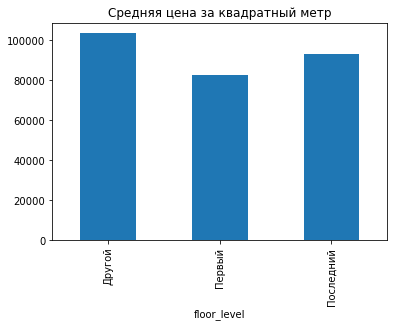

In [40]:
df.groupby('floor_level')['price_meter'].mean().plot(kind='bar', title='Средняя цена за квадратный метр')
plt.show()

Вывод: Квартиры стоят дороже, если они расположены не на первом и не на последнем этаже.

Также изучим зависимость от даты размещения: дня недели, месяца и года.


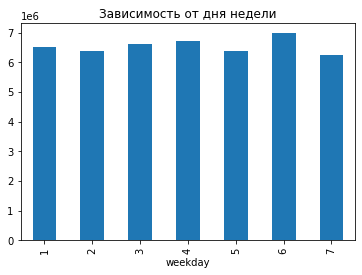

In [41]:
df.groupby('weekday')['last_price'].mean().plot(kind='bar', title='Зависимость от дня недели')
plt.show()

In [42]:
print(df['last_price'].corr(df['weekday']))

0.0015501452176215438


Взаимосвязь отсутсвует

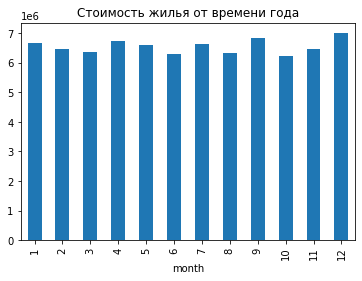

In [43]:
df.groupby('month')['last_price'].mean().plot(kind='bar', title='Стоимость жилья от времени года')
plt.show()

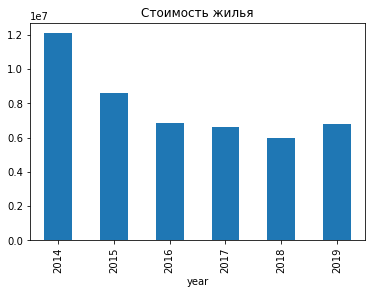

In [44]:
df.groupby('year')['last_price'].mean().plot(kind='bar', title='Стоимость жилья')
plt.show()

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [45]:
df.pivot_table(index='city_name', values='price_meter', aggfunc=('count', 'mean')).sort_values(by='count', ascending=False).head(10)

,count,mean
city_name,,
Санкт-Петербург,15749.0,114837.271827
посёлок Мурино,522.0,85752.181992
посёлок Шушары,440.0,78677.379545
Всеволожск,398.0,68654.474874
Пушкин,369.0,103125.818428
Колпино,338.0,75424.571006
посёлок Парголово,327.0,90175.886850
Гатчина,307.0,68746.110749
деревня Кудрово,299.0,92473.588629


Больше всего объявлений о продаже в Санкт-Петербурге, средняя цена квадратного метра в нем составляет 114837 руб. Дешевле всего квадратный метр стоит в Выборге: 58141 руб.

Изучим предложения квартир: Выделим квартиры в Санкт-Петербурге и выясним какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

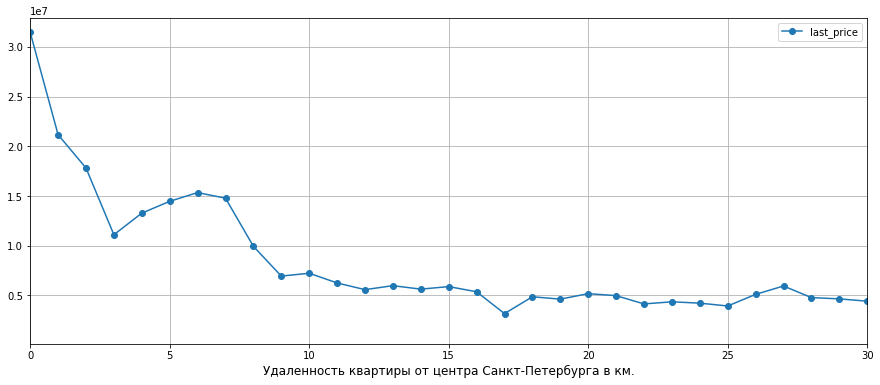

In [46]:
df['center_dist_km'] = round(df['center_dist'] / 1000)

data_spb_pivot = df.pivot_table(index='center_dist_km', values='last_price')
data_spb_pivot.plot(style='o-', grid=True, figsize=(15,6), xlim=(0,30))
plt.xlabel('Удаленность квартиры от центра Санкт-Петербурга в км.', fontsize=12)
plt.show()

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [47]:
center = df.query('center_dist < 4000') # центр опредлен в рдиусе 4 км

<AxesSubplot:>

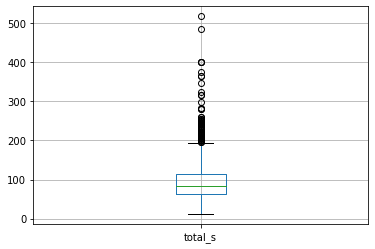

In [48]:
center.boxplot('total_s')

In [49]:
center.total_s.mean()

97.37136480686695

Средняя площадь квартиры в центре приблизительно равна 97 кв.м., что **на 37 метров больше** общегородского показателя. В основном, площадь не првышает 280 метров, но у некоторых квартир цена превышает и 500 кв.м.,

Определим **стоимость квартиры в центре в радиусе 4 км**.

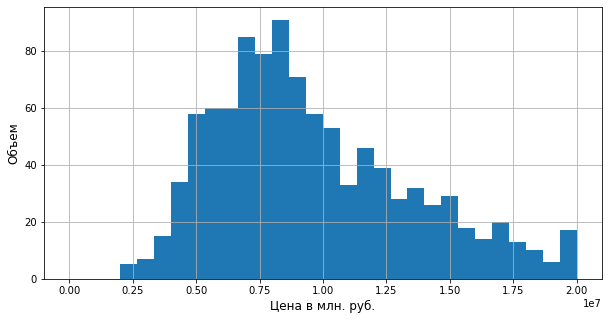

In [50]:
center['last_price'].hist(bins=30, range=(0, 20000000), figsize=(10, 5))
plt.xlabel('Цена в млн. руб.', fontsize=12)
plt.ylabel('Объем', fontsize=12)
plt.show()

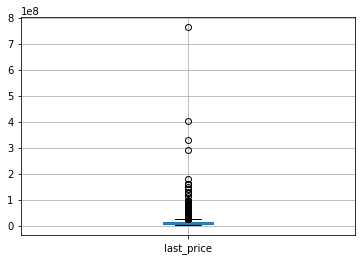

In [51]:
center.boxplot('last_price')
plt.show()

In [52]:
print(f'Медианное значение цены на квартиру в центре составляет {round(center["last_price"].median()) / 1000000} млн.руб.')

Медианное значение цены на квартиру в центре составляет 9.5 млн.руб.


Этот показатель **больше общегородского на 5 млн. руб.** В основном, стоимость квартиры в центре не превышает 20 млн. руб., но стоимость некоторых из них достигает и  763 млн.руб.

In [53]:
print(f'Среднее значение высоты потолков в центре составляет {round(center.ceiling_h.mean(), 2)} метра, что на 45 см выше, чем в целом по СПБ и ЛО.')

Среднее значение высоты потолков в центре составляет 3.22 метра, что на 45 см выше, чем в целом по СПБ и ЛО.


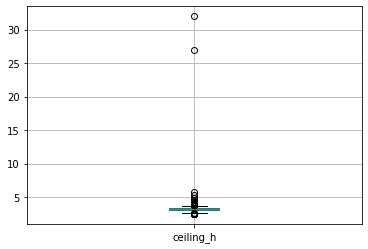

In [54]:
center.boxplot('ceiling_h')
plt.show()

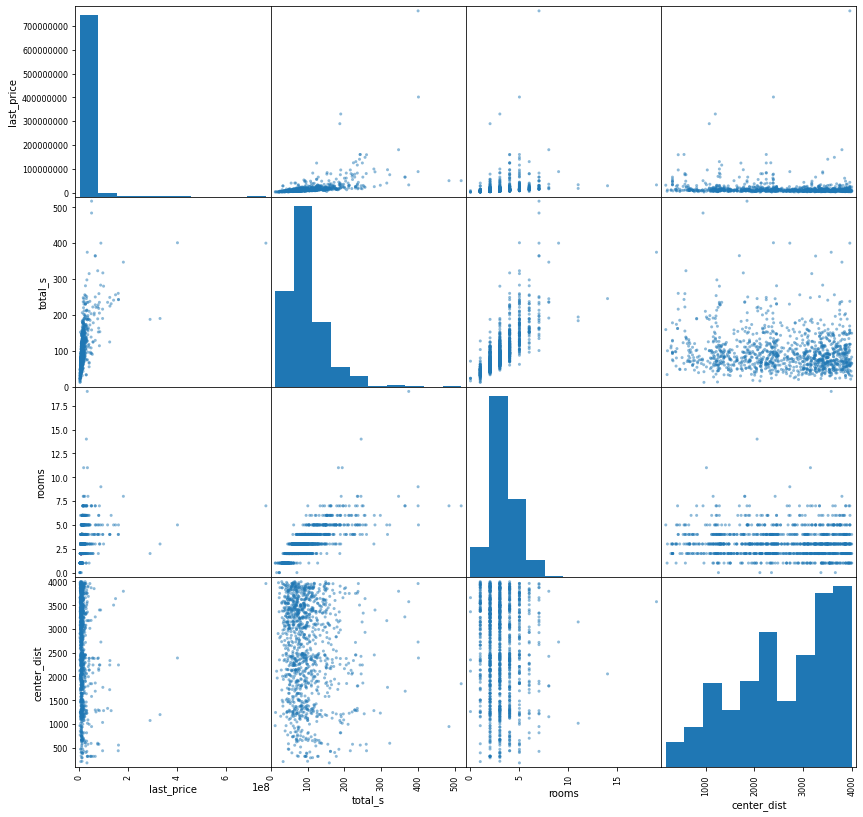

In [55]:
center_price_factors = center[['last_price', 'total_s', 'rooms', 'center_dist']]
pd.plotting.scatter_matrix(center_price_factors, figsize=(14, 14))
plt.show()

Среди всех графиков наблюдается взаимосвязь количества комнат и площадь, но этот аспект нас не интересует. Небольшая взаимосвязь наблюдается при влиянии удаленности квартир на площадь квартир.

In [56]:
print(center['rooms'].corr(center['last_price']))

0.24449068630986692


Небольшое влияние количества комнат на стоимость квартиры имеется.

In [57]:
print(center['floor'].corr(center['last_price']))

0.223014571521789


Наблюдается небольшое влияние уровня этажа на стоимость квартиры.

In [58]:
print(center['last_price'].corr(center['center_dist']))

-0.09404269320790161


Удаленность квартиры в пределах центра не влияет на цену.

In [59]:
print(center['month'].corr(center['last_price']))

-0.011388950288653117


Время размещения объявления не влияет на цену.

### Шаг 5. Общий вывод

На наш взгляд, наибольшее влияние на цену квартиры оказывает площадь квартиры, приближенность к центру, в меньшей степени влияют на стоимость квартиры количество комнат.